# Librerias


In [83]:
# Para la importación de los datos desde Socrata
from sodapy  import Socrata

from datetime   import datetime
import pandas   as pd
import numpy    as np
import warnings
import scipy.stats as stats
import math

#Para gráficos y mapas de calor
import seaborn            as sb
import matplotlib.pyplot  as plt
import plotly.graph_objs  as go

#Para la imputación de los datos
from sklearn.impute     import SimpleImputer
from sklearn.compose    import ColumnTransformer
import missingno        as msno

#Para el pre-procesamiento de los datos
from sklearn.preprocessing      import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.feature_selection  import SelectKBest, chi2

import seaborn as sns
import matplotlib.pyplot as plt



#Para generar los modelos
from sklearn.model_selection    import train_test_split
from sklearn.metrics            import mean_squared_error, r2_score
import statsmodels.api          as sm
import statsmodels.formula.api  as smf


# Suprimir los warnings específicos
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Lectura


In [ ]:
#inicio = datetime.now()
#print(f"Hora inicial: {inicio.strftime('%Y-%m-%d %H:%M:%S')}")

#client = Socrata("www.datos.gov.co", None, timeout=60)
#DATASET = "kgxf-xxbe"

#limit = 50_000
#offset = 0
#frames = []

#while True:
#    results = client.get(DATASET, limit=limit, offset=offset)
#    if not results:
#        break
#    frames.append(pd.DataFrame.from_records(results))
#    offset += limit

#saber11_df = pd.concat(frames, ignore_index=True)

# ----------------------------------------
#fin = datetime.now()
#print(f"Hora final:   {fin.strftime('%Y-%m-%d %H:%M:%S')}")
#print(f"Duración total: {fin - inicio}")
#print(f"Filas descargadas: {saber11_df.shape[0]:,}")
# ----------------------------------------


El conjunto de datos corresponde a los Resultados únicos de la prueba Saber 11, publicados por el ICFES y disponibles en el portal Datos Abiertos de Colombia.
Contiene información detallada sobre los estudiantes que presentaron la prueba, las características del colegio y variables familiares y socioeconómicas asociadas al desempeño académico.


La versión empleada fue obtenida mediante la API pública de Socrata, lo que permitió descargar el total de registros (7.109.704 observaciones)

En caso de que la información extraida por la API no este disponible , disponemos de la siguiente celda para poder cargar los datos directamente de un archivo ".parquet".

- para poder hacer uso de esta alternativa debemos descomentar la linea de codigo y ejecutar la celda 

In [158]:
saber11_df = pd.read_parquet("saber11_completo.parquet")
saber11_df.shape[0]

7109704

Para poder identificar el tipo de dato de las columnas y si tienen alguna novedad que debamos tener en cuenta para tratar los datos correctamente  utilizaremos el comando ".info()" para ver el tipo de dato de cada campo .

- Encontramos que todos los datos cargados del dataframe son de tipo "object" 
- Por lo que mas adelante se tendra que modificar el tipo de dato en algunos campos para poder tratarlos correctamente

In [159]:
saber11_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109704 entries, 0 to 7109703
Data columns (total 51 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   periodo                        object
 1   estu_tipodocumento             object
 2   estu_consecutivo               object
 3   cole_area_ubicacion            object
 4   cole_bilingue                  object
 5   cole_calendario                object
 6   cole_caracter                  object
 7   cole_cod_dane_establecimiento  object
 8   cole_cod_dane_sede             object
 9   cole_cod_depto_ubicacion       object
 10  cole_cod_mcpio_ubicacion       object
 11  cole_codigo_icfes              object
 12  cole_depto_ubicacion           object
 13  cole_genero                    object
 14  cole_jornada                   object
 15  cole_mcpio_ubicacion           object
 16  cole_naturaleza                object
 17  cole_nombre_establecimiento    object
 18  cole_nombre_sede      

El dataset cuenta con 51 columnas, que abarcan:

Identificación y datos personales del estudiante: tipo de documento, género, fecha de nacimiento, departamento y municipio de residencia.
Información del establecimiento educativo: nombre, código DANE, ubicación geográfica, calendario, carácter, jornada y naturaleza del colegio.

Contexto familiar: nivel educativo de los padres, número de personas en el hogar y acceso a bienes como computador, internet o lavadora.

Resultados académicos: puntajes por área (lectura crítica, matemáticas, ciencias naturales, sociales e inglés) y el puntaje global.

In [160]:
saber11_df.head(4)

,periodo,estu_tipodocumento,estu_consecutivo,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_cod_depto_ubicacion,cole_cod_mcpio_ubicacion,cole_codigo_icfes,cole_depto_ubicacion,cole_genero,cole_jornada,cole_mcpio_ubicacion,cole_naturaleza,cole_nombre_establecimiento,cole_nombre_sede,cole_sede_principal,estu_cod_depto_presentacion,estu_cod_mcpio_presentacion,estu_cod_reside_depto,estu_cod_reside_mcpio,estu_depto_presentacion,estu_depto_reside,estu_estadoinvestigacion,estu_estudiante,estu_fechanacimiento,estu_genero,estu_mcpio_presentacion,estu_mcpio_reside,estu_nacionalidad,estu_pais_reside,estu_privado_libertad,fami_cuartoshogar,fami_educacionmadre,fami_educacionpadre,fami_estratovivienda,fami_personashogar,fami_tieneautomovil,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,desemp_ingles,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
0,20131,CR,SB11201310000414,URBANO,N,B,ACADÉMICO,311848000812,311848000812,11,11001,022574,BOGOTA,FEMENINO,COMPLETA,BOGOTÁ D.C.,NO OFICIAL,GIMN FEMENINO,GIMN FEMENINO,S,11,11001,11,11001,BOGOTÁ,BOGOTÁ,PUBLICAR,ESTUDIANTE,08/08/1994,F,BOGOTÁ D.C.,BOGOTÁ D.C.,COLOMBIA,COLOMBIA,N,Cuatro,Educación profesional completa,Educación profesional completa,Estrato 6,Cuatro,Si,Si,Si,Si,B+,94,88,None,None,None,None
1,20194,TI,SB11201940464873,RURAL,N,A,TÉCNICO/ACADÉMICO,141016000305,241016000342,41,41016,194878,HUILA,MIXTO,COMPLETA,AIPE,OFICIAL,INSTITUCION EDUCATIVA JESUS MARIA AGUIRRE CHARRY,DINDAL,N,41,41016,41,41016,HUILA,HUILA,PUBLICAR,ESTUDIANTE,15/02/2003,F,AIPE,AIPE,COLOMBIA,COLOMBIA,N,Dos,Postgrado,Primaria completa,Estrato 2,1 a 2,No,Si,Si,Si,B1,71,66,70,65,69,339
2,20194,TI,SB11201940464873,RURAL,N,A,TÉCNICO/ACADÉMICO,141016000305,241016000342,41,41016,194878,HUILA,MIXTO,COMPLETA,AIPE,OFICIAL,INSTITUCION EDUCATIVA JESUS MARIA AGUIRRE CHARRY,DINDAL,N,41,41016,41,41016,HUILA,HUILA,PUBLICAR,ESTUDIANTE,15/02/2003,F,AIPE,AIPE,COLOMBIA,COLOMBIA,N,Dos,Postgrado,Primaria completa,Estrato 2,1 a 2,No,Si,Si,Si,B1,71,66,70,65,69,339
3,20122,TI,SB11201220204399,URBANO,N,A,TÉCNICO/ACADÉMICO,163130000718,163130000718,63,63130,013029,QUINDIO,MIXTO,MAÑANA,CALARCÁ,OFICIAL,INSTITUCION EDUCATIVA ANTONIO NARIÑO,ANTONIO NARIÑO,S,63,63130,63,63130,QUINDIO,QUINDIO,PUBLICAR,ESTUDIANTE,20/05/1996,F,CALARCÁ,CALARCÁ,COLOMBIA,COLOMBIA,N,Dos,Secundaria (Bachillerato) incompleta,No sabe,Estrato 1,Cuatro,No,Si,Si,No,A1,48,45,None,None,None,None


In [161]:
# Cálculo de la edad del estudiante

# 1. Convertir la fecha de nacimiento a datetime
saber11_df['estu_fechanacimiento'] = pd.to_datetime(
    saber11_df['estu_fechanacimiento'],
    format='%d/%m/%Y',
    errors='coerce'  # convierte fechas imposibles en NaT
)

# 2. Separar año y trimestre
saber11_df['anio'] = saber11_df['periodo'].astype(str).str[:4].astype(int)
saber11_df['trimestre'] = saber11_df['periodo'].astype(str).str[-1].astype(int)

# 3. Mapear trimestre a fecha de corte
mapa_fechas = {1: (3, 31), 2: (6, 30), 3: (9, 30), 4: (12, 31)}

def calcular_fecha_corte(row):
    mes, dia = mapa_fechas[row['trimestre']]
    return datetime(row['anio'], mes, dia)

saber11_df['fecha_corte'] = saber11_df.apply(calcular_fecha_corte, axis=1)

# 4. Calcular edad en años
def calcular_edad(row):
    edad = row['fecha_corte'].year - row['estu_fechanacimiento'].year
    # Restar un año si aún no ha cumplido años en la fecha de corte
    if (row['fecha_corte'].month, row['fecha_corte'].day) < (row['estu_fechanacimiento'].month, row['estu_fechanacimiento'].day):
        edad -= 1
    return edad

saber11_df['estu_edad_anios'] = saber11_df.apply(calcular_edad, axis=1)

# 5. Eliminar columnas temporales
saber11_df.drop(columns=['fecha_corte', 'anio', 'trimestre'], inplace=True)

In [162]:
# Quitar columnas que incluyen códigos de estabelcimiento o geografía, que son redundantes

cols_a_eliminar = [
    'estu_tipodocumento', 'estu_consecutivo', 'cole_cod_dane_establecimiento',
    'cole_cod_dane_sede', 'cole_cod_depto_ubicacion', 'cole_cod_mcpio_ubicacion',
    'cole_nombre_establecimiento', 'cole_nombre_sede', 'estu_cod_depto_presentacion',
    'estu_cod_mcpio_presentacion', 'estu_cod_reside_depto', 'estu_cod_reside_mcpio',
    'estu_fechanacimiento'
]

saber11_df = saber11_df.drop(columns=[c for c in cols_a_eliminar if c in saber11_df.columns])



<Axes: >

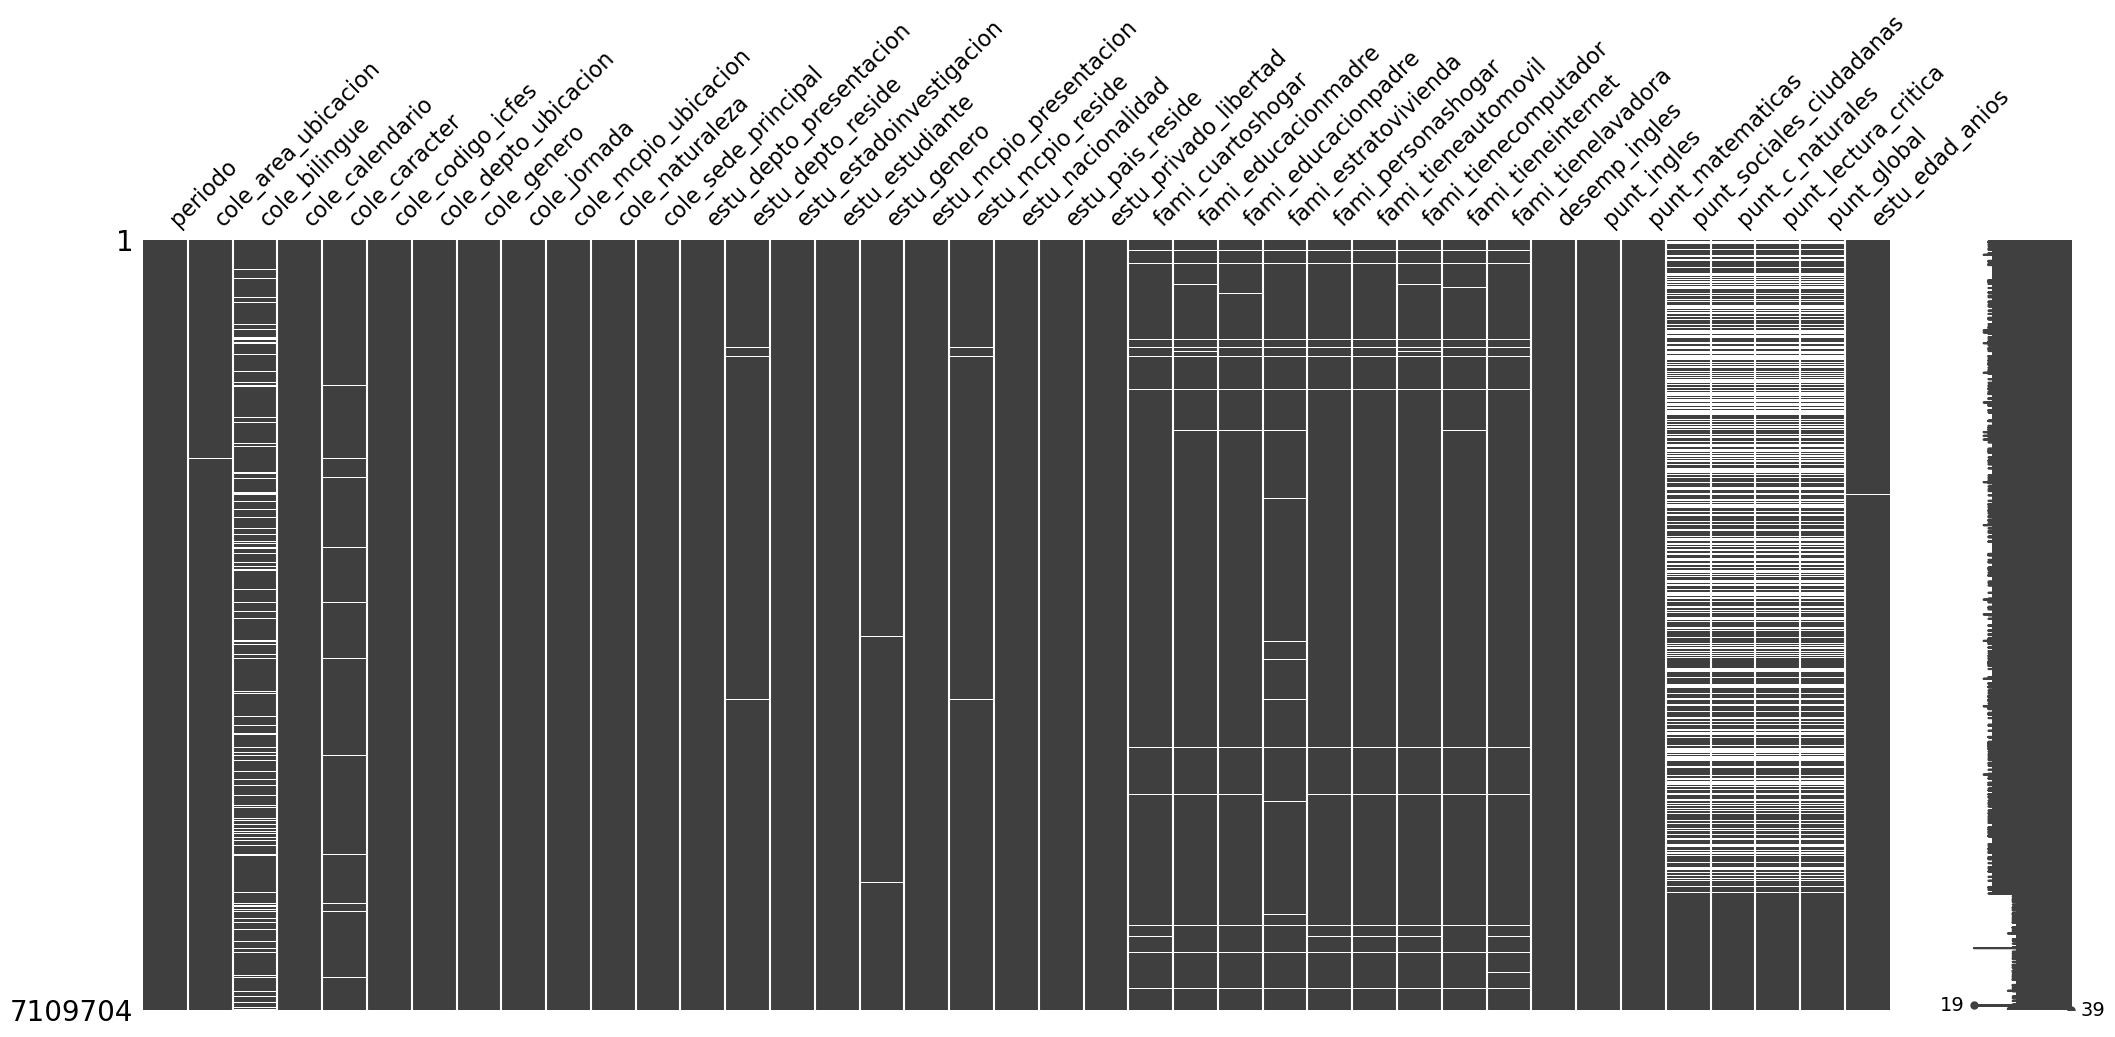

In [163]:
msno.matrix(saber11_df)

vista preliminar del dataframe para poder ver con que estructura empezaremos a trabajar 

In [164]:
def porcentaje_faltantes(df):
    faltantes = df.isnull().sum()
    porcentaje_faltantes = (faltantes / len(df)) * 100
    df_faltantes = pd.DataFrame({'Datos Faltantes': faltantes, 'Porcentaje': porcentaje_faltantes})
    df_faltantes = df_faltantes[df_faltantes['Datos Faltantes'] > 0]
    return df_faltantes

df_faltantes = porcentaje_faltantes(saber11_df)
df_faltantes

,Datos Faltantes,Porcentaje
cole_area_ubicacion,3031,0.042632
cole_bilingue,916870,12.896036
cole_calendario,1536,0.021604
cole_caracter,110212,1.550163
cole_codigo_icfes,23733,0.333811
cole_depto_ubicacion,23,0.000324
cole_genero,23,0.000324
cole_jornada,23,0.000324
cole_mcpio_ubicacion,23,0.000324
cole_naturaleza,23,0.000324


la mayoría de las variables presentan una completitud superior al 95 %, lo que indica una buena calidad general del conjunto de datos.
Los valores faltantes más relevantes se concentran en:

cole_bilingue con un 12,89 % de registros vacíos.
Variables familiares como fami_educacionmadre, fami_educacionpadre, fami_estratovivienda y fami_tieneinternet, con porcentajes entre 2 % y 3 %.

Las variables de resultados punt_sociales_ciudadanas, punt_c_naturales, punt_lectura_critica y punt_global, con aproximadamente 36,7 % de valores faltantes, lo que sugiere que una parte importante de los registros no cuenta con calificación completa.

In [165]:
# Quitar columnas que incluyen códigos de estabelcimiento o geografía, que son redundantes

saber11_df.drop(columns=['estu_tipodocumento', 'estu_consecutivo', 'cole_cod_dane_establecimiento', 'cole_cod_dane_sede', 'cole_cod_depto_ubicacion', 'cole_cod_mcpio_ubicacion', 'cole_nombre_establecimiento', 'cole_nombre_sede', 'estu_cod_depto_presentacion', 'estu_cod_mcpio_presentacion', 'estu_cod_reside_depto', 'estu_cod_reside_mcpio', 'estu_fechanacimiento'], inplace=True)

saber11_df.info()



KeyError: "['estu_tipodocumento', 'estu_consecutivo', 'cole_cod_dane_establecimiento', 'cole_cod_dane_sede', 'cole_cod_depto_ubicacion', 'cole_cod_mcpio_ubicacion', 'cole_nombre_establecimiento', 'cole_nombre_sede', 'estu_cod_depto_presentacion', 'estu_cod_mcpio_presentacion', 'estu_cod_reside_depto', 'estu_cod_reside_mcpio', 'estu_fechanacimiento'] not found in axis"

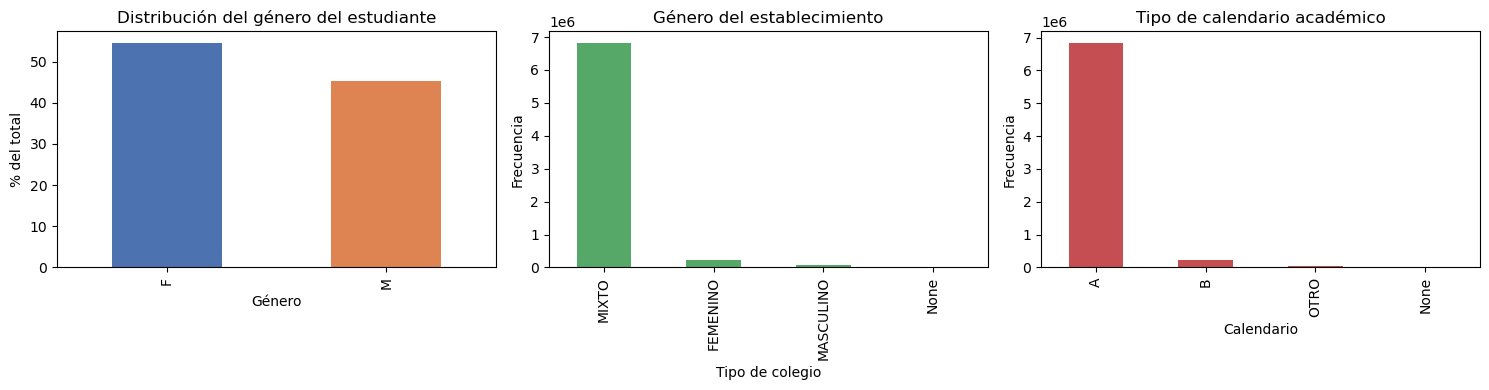

In [ ]:
plt.figure(figsize=(15,4))

#  Género del estudiante
plt.subplot(1,3,1)
saber11_df['estu_genero'].value_counts(normalize=True).sort_values(ascending=False).mul(100).plot(
    kind='bar', color=['#4C72B0','#DD8452'])
plt.title('Distribución del género del estudiante')
plt.ylabel('% del total')
plt.xlabel('Género')

# Género del colegio
plt.subplot(1,3,2)
saber11_df['cole_genero'].value_counts(dropna=False).plot(
    kind='bar', color='#55A868')
plt.title('Género del establecimiento')
plt.ylabel('Frecuencia')
plt.xlabel('Tipo de colegio')

# Calendario escolar
plt.subplot(1,3,3)
saber11_df['cole_calendario'].value_counts(dropna=False).plot(
    kind='bar', color='#C44E52')
plt.title('Tipo de calendario académico')
plt.ylabel('Frecuencia')
plt.xlabel('Calendario')

plt.tight_layout()
plt.show()



En la distribución por género del estudiante, se observa una ligera mayoría de mujeres, que representan algo más del 50 % de la muestra. Esto refleja una participación equilibrada entre ambos géneros en la prueba Saber 11, sin diferencias marcadas en la cobertura.

En cuanto al género del establecimiento educativo, la gran mayoría de los estudiantes proviene de colegios mixtos, mientras que los establecimientos exclusivamente femeninos o masculinos son minoritarios. Este patrón es coherente con la tendencia nacional hacia la educación mixta.

Respecto al tipo de calendario académico, predomina el calendario A, que agrupa a la mayoría de instituciones oficiales del país. El calendario B tiene una presencia reducida, asociada principalmente a colegios privados bilingües o de orientación internacional.


## Analisis sociodemografico

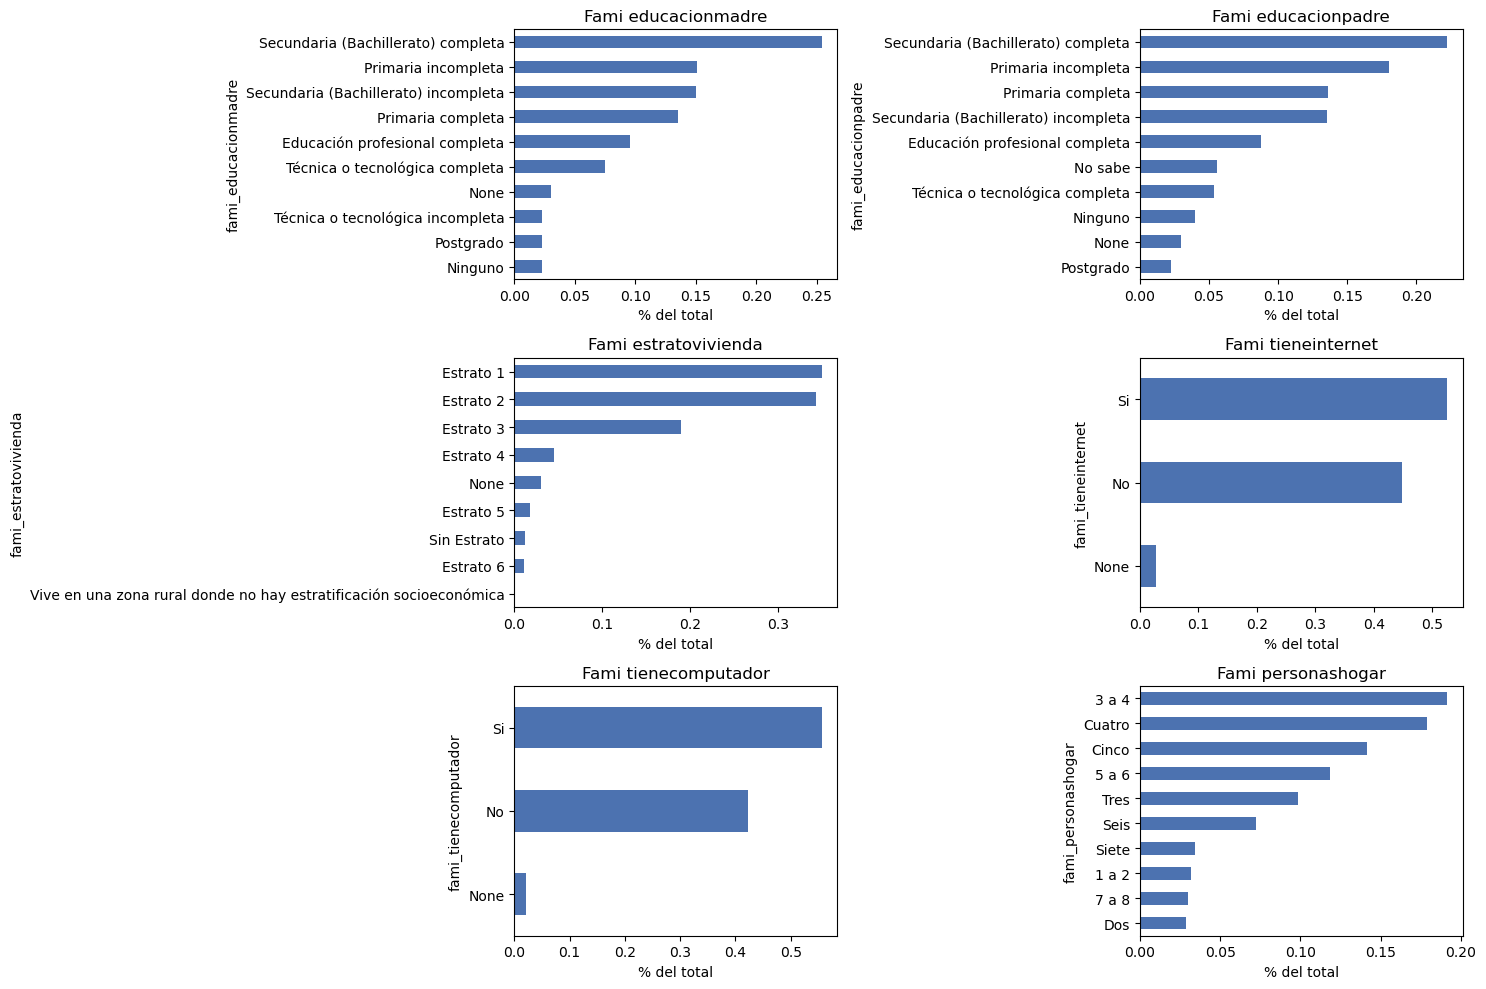

In [ ]:
cols = [
    "fami_educacionmadre",
    "fami_educacionpadre",
    "fami_estratovivienda",
    "fami_tieneinternet",
    "fami_tienecomputador",
    "fami_personashogar"
]

plt.figure(figsize=(15,10))
for i, col in enumerate(cols, 1):
    plt.subplot(3,2,i)
    saber11_df[col].value_counts(normalize=True, dropna=False).head(10).sort_values(ascending=True).plot(
        kind='barh', color='#4C72B0')
    plt.title(col.replace("_"," ").capitalize())
    plt.xlabel('% del total')
plt.tight_layout()
plt.show()


En el entorno familiar se observa que la mayoría de los padres y madres alcanzaron como máximo la educación secundaria completa, mientras que una proporción menor logró niveles técnicos, tecnológicos o profesionales. Los porcentajes de educación universitaria y posgrado son marginales, lo que evidencia un nivel educativo medio-bajo en los hogares de los estudiantes.

Respecto a la condición socioeconómica, los estratos 1, 2 y 3 concentran la mayor parte de la población, representando juntos más del 80 %. Esto confirma que la mayoría de los examinados pertenecen a hogares de ingresos medios o bajos.

En cuanto al acceso a recursos tecnológicos, aproximadamente la mitad de los estudiantes reporta tener internet y computador en el hogar, lo que sugiere una brecha digital importante que puede incidir en las oportunidades educativas.

Por último, la mayoría de los hogares están compuestos por tres a cinco personas, lo que refleja un tamaño familiar típico dentro del promedio nacional.

In [ ]:
def codificar_categoricas(df):
    diccionarios = {}
    df_cod = pd.DataFrame(index=df.index)

    for col in df.columns:
        cats = pd.Categorical(df[col])
        codigos = pd.Series(cats.codes, index=df.index).replace(-1, 0)  # NaN → 0
        df_cod[col + "_num"] = codigos.astype("int32")
        diccionarios[col] = {str(cat): i+1 for i, cat in enumerate(cats.categories)}

    return diccionarios, df_cod


# aplicar solo a columnas sociodemográficas
df_sociodem_2 = saber11_df[cols].copy()

diccionarios, df_sociodem_2 = codificar_categoricas(df_sociodem_2)

# calcular estadísticas
estadisticas_df = df_sociodem_2.describe().T
estadisticas_df["varianza"] = df_sociodem_2.var()
estadisticas_df


,count,mean,std,min,25%,50%,75%,max,varianza
fami_educacionmadre_num,7109704.0,6.513071,3.084072,0.0,6.0,8.0,8.0,11.0,9.511500
fami_educacionpadre_num,7109704.0,6.237305,3.011063,0.0,5.0,7.0,8.0,11.0,9.066499
fami_estratovivienda_num,7109704.0,1.057903,1.179171,0.0,0.0,1.0,2.0,7.0,1.390444
fami_tieneinternet_num,7109704.0,0.525152,0.499367,0.0,0.0,1.0,1.0,1.0,0.249367
fami_tienecomputador_num,7109704.0,0.555718,0.496886,0.0,0.0,1.0,1.0,1.0,0.246896
fami_personashogar_num,7109704.0,5.962260,4.894458,0.0,2.0,5.0,9.0,16.0,23.955718


El nivel educativo promedio de las madres es de 6.51, mientras que el de los padres es de 6.23, lo que indica que, en general, ambos alcanzaron niveles equivalentes a la educación secundaria completa o media técnica. La varianza cercana a 9.5 en ambos casos refleja una amplia dispersión en los niveles educativos, es decir, existen hogares con padres sin educación formal y otros con formación profesional o superior.

En cuanto al estrato socioeconómico, la media de 1.05 confirma que la mayoría de los estudiantes proviene de hogares de bajos ingresos (estratos 1 y 2). La baja varianza (1.39) sugiere poca dispersión, es decir, una concentración clara en los estratos más bajos.

Respecto al acceso a internet y computador en el hogar, las medias de 0.52 y 0.55, respectivamente, indican que alrededor de la mitad de los estudiantes cuenta con estos recursos, mientras que la otra mitad no. Las varianzas cercanas a 0.25 reflejan una distribución binaria equilibrada, lo que evidencia una brecha digital significativa.

Por último, el número promedio de personas en el hogar es de 5.96, con una varianza alta (23.95), lo que sugiere gran diversidad en el tamaño de los hogares. Aunque el promedio se sitúa alrededor de cinco o seis integrantes, existen tanto hogares pequeños como familias numerosas.

### Analisis puntaje academico 

In [ ]:
cols_puntajes = [
    "punt_lectura_critica",
    "punt_matematicas",
    "punt_c_naturales",
    "punt_sociales_ciudadanas",
    "punt_ingles",
    "punt_global"
]

# limpieza y conversión segura
for col in cols_puntajes:
    saber11_df[col] = (
        saber11_df[col]
        .astype(str)
        .str.replace(",", ".", regex=False)
        .replace(["None", "nan", "NaN", "NAN"], np.nan)
    )
    saber11_df[col] = pd.to_numeric(saber11_df[col], errors="coerce")

# resumen estadístico
resumen_puntajes = saber11_df[cols_puntajes].describe().T
resumen_puntajes["varianza"] = saber11_df[cols_puntajes].var()
resumen_puntajes



,count,mean,std,min,25%,50%,75%,max,varianza
punt_lectura_critica,4500181.0,52.184939,10.385772,0.0,45.0,52.0,60.0,100.00,107.864259
punt_matematicas,7109704.0,49.303258,11.907127,0.0,41.0,49.0,57.0,127.00,141.779676
punt_c_naturales,4500181.0,50.106060,10.569585,0.0,42.0,50.0,57.0,100.00,111.716131
punt_sociales_ciudadanas,4500181.0,48.865358,11.730556,0.0,40.0,49.0,57.0,100.00,137.605942
punt_ingles,7105525.0,48.589927,12.228090,-1.0,41.0,46.0,54.0,117.29,149.526185
punt_global,4500181.0,252.303317,50.426683,0.0,215.0,249.0,287.0,495.00,2542.850383


En promedio, los puntajes por área se concentran entre 49 y 52 puntos, lo que sugiere un rendimiento medio estable entre las distintas competencias evaluadas. Las áreas de Lectura Crítica (52,18) y Ciencias Naturales (50,10) muestran promedios ligeramente superiores al resto, mientras que Sociales y Ciudadanas (48,86) es la de menor desempeño.

La desviación estándar en todas las áreas (≈10–12 puntos) refleja una dispersión moderada, es decir, los puntajes tienden a agruparse alrededor de la media, aunque existen diferencias notables entre estudiantes con desempeños altos y bajos.

En el caso de Matemáticas, el promedio es de 49,3 con una varianza de 141,7, evidenciando una dispersión algo mayor que en las demás áreas, posiblemente asociada a diferencias en formación cuantitativa.

El puntaje de Inglés (48,6) presenta la mayor variabilidad (varianza 149,5), lo que indica una amplia brecha en el dominio del idioma.

Finalmente, el puntaje global tiene una media de 252,3 y una desviación de 50,4, lo que confirma una heterogeneidad considerable en el desempeño general de los estudiantes.

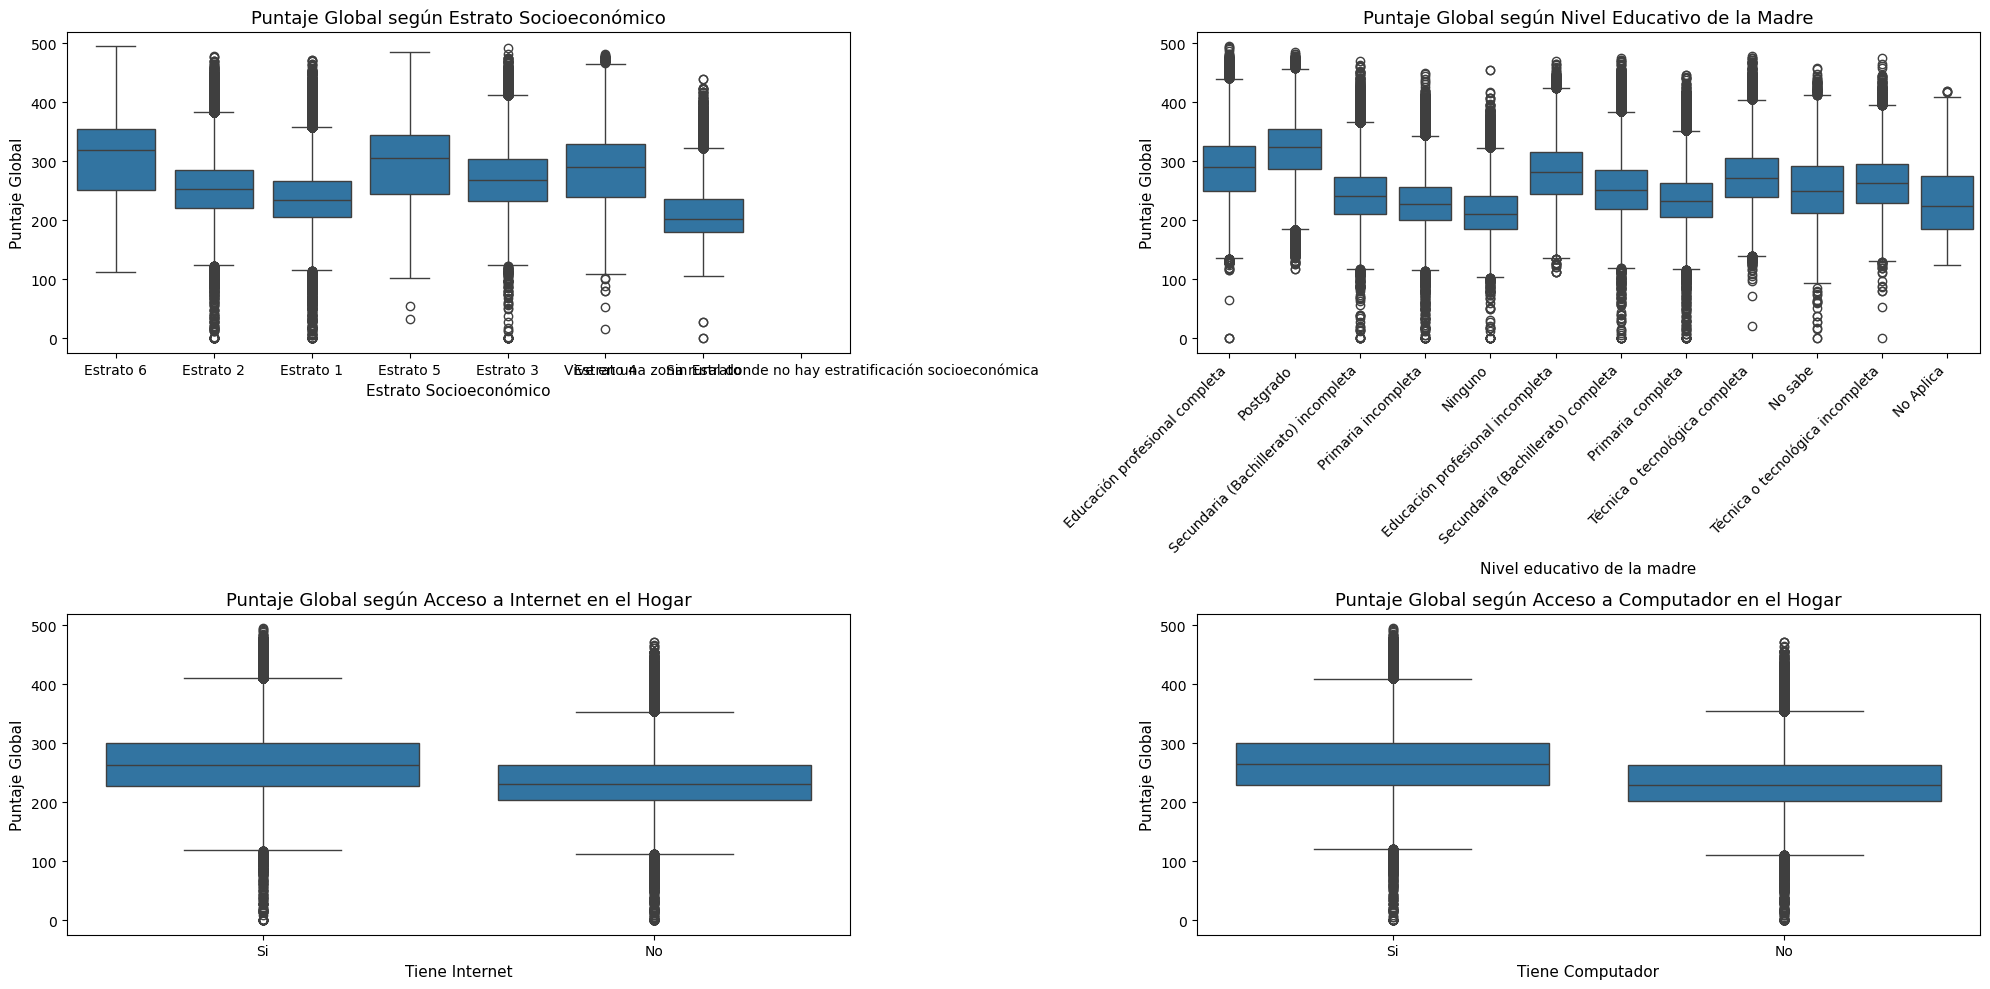

In [ ]:
plt.figure(figsize=(20, 10))

# Estrato socioeconómico
plt.subplot(2, 2, 1)
sns.boxplot(x='fami_estratovivienda', y='punt_global', data=saber11_df)
plt.title('Puntaje Global según Estrato Socioeconómico', fontsize=13)
plt.xlabel('Estrato Socioeconómico', fontsize=11)
plt.ylabel('Puntaje Global', fontsize=11)

# Educación de la madre
plt.subplot(2, 2, 2)
sns.boxplot(x='fami_educacionmadre', y='punt_global', data=saber11_df)
plt.title('Puntaje Global según Nivel Educativo de la Madre', fontsize=13)
plt.xlabel('Nivel educativo de la madre', fontsize=11)
plt.ylabel('Puntaje Global', fontsize=11)
plt.xticks(rotation=45, ha='right')

# Acceso a Internet
plt.subplot(2, 2, 3)
sns.boxplot(x='fami_tieneinternet', y='punt_global', data=saber11_df)
plt.title('Puntaje Global según Acceso a Internet en el Hogar', fontsize=13)
plt.xlabel('Tiene Internet', fontsize=11)
plt.ylabel('Puntaje Global', fontsize=11)

# Acceso a Computador
plt.subplot(2, 2, 4)
sns.boxplot(x='fami_tienecomputador', y='punt_global', data=saber11_df)
plt.title('Puntaje Global según Acceso a Computador en el Hogar', fontsize=13)
plt.xlabel('Tiene Computador', fontsize=11)
plt.ylabel('Puntaje Global', fontsize=11)

plt.tight_layout()
plt.show()


En la primera gráfica se observa una relación positiva entre el estrato socioeconómico y el puntaje global. Los estudiantes de estratos 5 y 6 presentan medianas de puntaje más altas, mientras que los de estrato 1 concentran valores más bajos. Esto sugiere que las condiciones socioeconómicas del hogar tienen una incidencia directa en el desempeño académico, posiblemente asociada al acceso a recursos educativos y entornos de aprendizaje más favorables.

En cuanto al nivel educativo de la madre, se evidencia una tendencia similar a mayor nivel de educación, mayor puntaje global. 
Los hijos de madres con educación técnica, profesional o posgrado tienden a ubicarse en rangos de puntaje más altos, mientras que los de madres con educación básica o primaria muestran distribuciones más bajas. Este patrón refuerza la idea de que el capital educativo familiar influye en las oportunidades de aprendizaje de los estudiantes.

Respecto al acceso a internet y a computador, ambos muestran diferencias claras en la mediana de puntajes. Los estudiantes que cuentan con estos recursos en casa tienden a obtener puntajes globales superiores, lo que destaca la importancia del acceso a herramientas tecnológicas como apoyo en los procesos de estudio y preparación.


### corelacion entre variables 

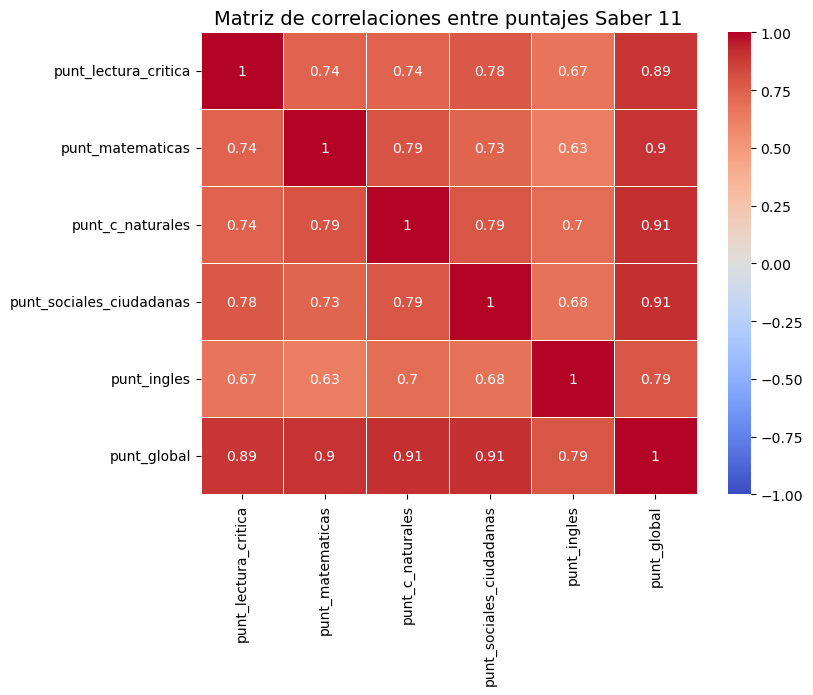

In [ ]:

cols_interes = [
    'punt_lectura_critica',
    'punt_matematicas',
    'punt_c_naturales',
    'punt_sociales_ciudadanas',
    'punt_ingles',
    'punt_global'
]

correlaciones = saber11_df[cols_interes].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Matriz de correlaciones entre puntajes Saber 11', fontsize=14)
plt.show()


Las áreas evaluadas presentan correlaciones positivas y fuertes, lo que indica que el desempeño de los estudiantes tiende a ser coherente entre las distintas competencias.
Las relaciones más altas se observan entre Matemáticas, Ciencias Naturales y Sociales, que muestran patrones de rendimiento similares y una influencia directa sobre el puntaje global.

Por su parte, Inglés mantiene una correlación positiva pero algo menor, lo que sugiere que su desempeño puede depender de factores externos como el acceso a recursos o la exposición al idioma.

En conjunto, los resultados reflejan que un buen desempeño en una competencia suele ir acompañado de buenos resultados en las demás, evidenciando una base académica general consistente.

In [ ]:
# Crear variable objetivo binaria
umbral = 300
saber11_df['alto_desempeno'] = (saber11_df['punt_global'].astype(float) >= umbral).astype(int)

# Verificar proporciones
saber11_df['alto_desempeno'].value_counts(normalize=True)


alto_desempeno
0    0.883864
1    0.116136
Name: proportion, dtype: float64

In [ ]:
X = saber11_df[[
    'estu_edad_anios',
    'cole_area_ubicacion',
    'cole_caracter',
    'cole_naturaleza',
    'cole_calendario',
    'fami_educacionmadre',
    'fami_educacionpadre',
    'fami_estratovivienda',
    'fami_tieneinternet',
    'fami_tienecomputador'
]]

y = saber11_df['alto_desempeno']


In [ ]:
saber11_df.columns.tolist()


['periodo',
 'estu_tipodocumento',
 'estu_consecutivo',
 'cole_area_ubicacion',
 'cole_bilingue',
 'cole_calendario',
 'cole_caracter',
 'cole_cod_dane_establecimiento',
 'cole_cod_dane_sede',
 'cole_cod_depto_ubicacion',
 'cole_cod_mcpio_ubicacion',
 'cole_codigo_icfes',
 'cole_depto_ubicacion',
 'cole_genero',
 'cole_jornada',
 'cole_mcpio_ubicacion',
 'cole_naturaleza',
 'cole_nombre_establecimiento',
 'cole_nombre_sede',
 'cole_sede_principal',
 'estu_cod_depto_presentacion',
 'estu_cod_mcpio_presentacion',
 'estu_cod_reside_depto',
 'estu_cod_reside_mcpio',
 'estu_depto_presentacion',
 'estu_depto_reside',
 'estu_estadoinvestigacion',
 'estu_estudiante',
 'estu_fechanacimiento',
 'estu_genero',
 'estu_mcpio_presentacion',
 'estu_mcpio_reside',
 'estu_nacionalidad',
 'estu_pais_reside',
 'estu_privado_libertad',
 'fami_cuartoshogar',
 'fami_educacionmadre',
 'fami_educacionpadre',
 'fami_estratovivienda',
 'fami_personashogar',
 'fami_tieneautomovil',
 'fami_tienecomputador',
 'fam

## Modelo regresión Lineal

In [ ]:

# Importar librerías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


In [ ]:

# Selección de variables predictoras y variable objetivo

X = saber11_df[[
    'estu_edad_anios',
    'cole_area_ubicacion',
    'cole_caracter',
    'cole_naturaleza',
    'cole_calendario',
    'fami_educacionmadre',
    'fami_educacionpadre',
    'fami_estratovivienda',
    'fami_tieneinternet',
    'fami_tienecomputador'
]]

y = saber11_df['punt_global'].astype(float)


In [ ]:
# Convertir puntaje global a numérico, forzando errores a NaN
y = pd.to_numeric(saber11_df['punt_global'], errors='coerce')


In [ ]:
# Eliminar filas donde falte el puntaje (y)

datos = pd.concat([X, y], axis=1).dropna(subset=['punt_global'])
print(f"Registros antes de limpieza: {len(saber11_df)}")
print(f"Registros después de limpieza: {len(datos)}")

X = datos.drop(columns=['punt_global'])
y = datos['punt_global']


Registros antes de limpieza: 7109704
Registros después de limpieza: 4500181


In [ ]:

# Codificar variables categóricas

X = pd.get_dummies(X, drop_first=True)

In [ ]:

# Imputar valores faltantes (moda)

imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [ ]:

# Alinear tamaños por seguridad

X_imputed = X_imputed.iloc[:len(y), :]

In [ ]:
# Dividir en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.3, random_state=42
)

print("División exitosa:", X_train.shape, y_train.shape)


División exitosa: (3150126, 39) (3150126,)


In [ ]:
# Entrenar modelo

modelo_reg = LinearRegression()
modelo_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Predicciones y evaluación

y_pred = modelo_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n Evaluación del modelo ")
print(f"MAE  (Error absoluto medio): {mae:.2f}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse:.2f}")
print(f"R²   (Coeficiente de determinación): {r2:.3f}")



 Evaluación del modelo 
MAE  (Error absoluto medio): 34.85
RMSE (Raíz del error cuadrático medio): 43.28
R²   (Coeficiente de determinación): 0.263


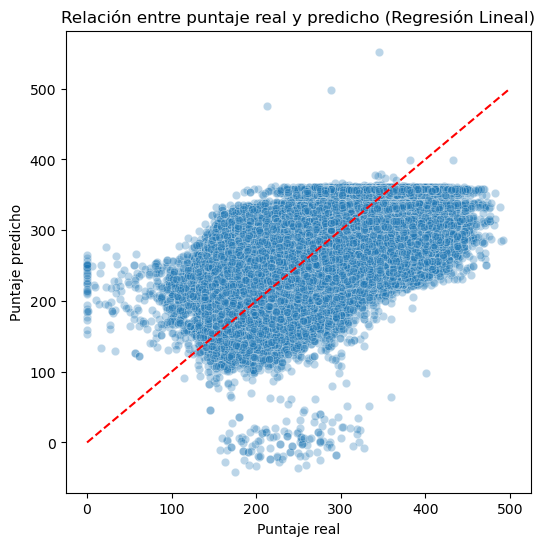

In [ ]:


# Gráfico real vs predicho

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([0, 500], [0, 500], '--', color='red')
plt.xlabel("Puntaje real")
plt.ylabel("Puntaje predicho")
plt.title("Relación entre puntaje real y predicho (Regresión Lineal)")
plt.show()


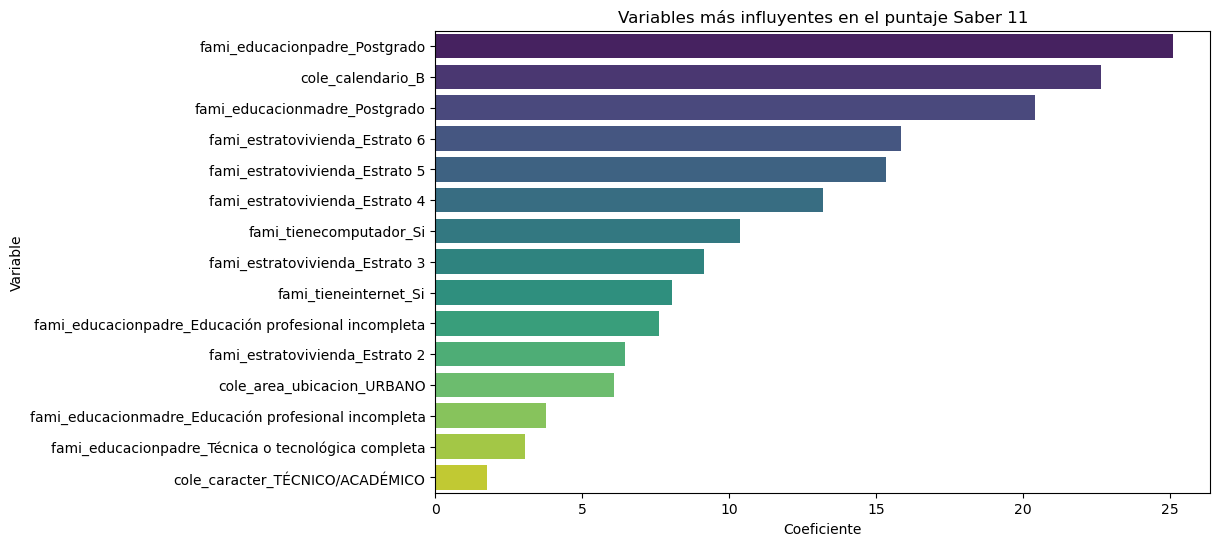

In [ ]:

# Importancia de variables

coeficientes = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': modelo_reg.coef_
}).sort_values(by='Coeficiente', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Coeficiente', y='Variable', data=coeficientes.head(15), palette='viridis')
plt.title("Variables más influyentes en el puntaje Saber 11")
plt.show()

## Conclusión del modelo de regresión lineal — Predicción del puntaje Saber 11

### Desempeño general del modelo
El modelo de **regresión lineal múltiple** obtuvo los siguientes resultados:

- **MAE (Error absoluto medio):** 34.85  
- **RMSE (Raíz del error cuadrático medio):** 43.28  
- **R² (Coeficiente de determinación):** 0.263  

Estos valores indican que el modelo logra capturar **aproximadamente el 26 % de la variabilidad** del puntaje global en las pruebas Saber 11.  
Aunque la capacidad predictiva es **moderada**, el modelo permite identificar **patrones estructurales** entre las características sociodemográficas, familiares y escolares y el rendimiento académico de los estudiantes.

El error medio de 34 a 43 puntos sugiere que el modelo puede predecir una tendencia general del puntaje, pero **no reemplaza una evaluación individual exacta**.  
Esto es esperable en datos educativos, donde intervienen factores cualitativos difíciles de medir (motivación, calidad docente, contexto institucional, etc.).

###  Interpretación del gráfico “Real vs. Predicho”
El gráfico de dispersión muestra que:
- Los puntos se agrupan alrededor de la línea roja (predicción ideal), pero con alta dispersión.  
- El modelo **subestima los puntajes altos** y **sobreestima los bajos**, lo que significa que tiende a predecir valores promedio.  
- Esto ocurre porque la regresión lineal **no capta relaciones no lineales** ni interacciones complejas entre variables.


## Random Forest Regressor

In [169]:
# Importar librerías necesarias

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [170]:
# Entrenar el modelo Random Forest

modelo_rf = RandomForestRegressor(
    n_estimators=100,      # árboles
    max_depth=10,          # profundidad
    random_state=42,
    n_jobs=-1              
)

modelo_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [171]:
# Predicciones

y_pred_rf = modelo_rf.predict(X_test)

In [173]:
# Evaluación del modelo

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\n Evaluación del modelo Random Forest Regressor")
print(f"MAE  (Error absoluto medio): {mae_rf:.2f}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse_rf:.2f}")
print(f"R²   (Coeficiente de determinación): {r2_rf:.3f}")


 Evaluación del modelo Random Forest Regressor
MAE  (Error absoluto medio): 33.82
RMSE (Raíz del error cuadrático medio): 42.05
R²   (Coeficiente de determinación): 0.304


In [174]:
# Comparación con el modelo lineal

print("\n Comparación entre modelos")
print(f"Regresión Lineal → R² = 0.263")
print(f"Random Forest    → R² = {r2_rf:.3f}")


 Comparación entre modelos
Regresión Lineal → R² = 0.263
Random Forest    → R² = 0.304


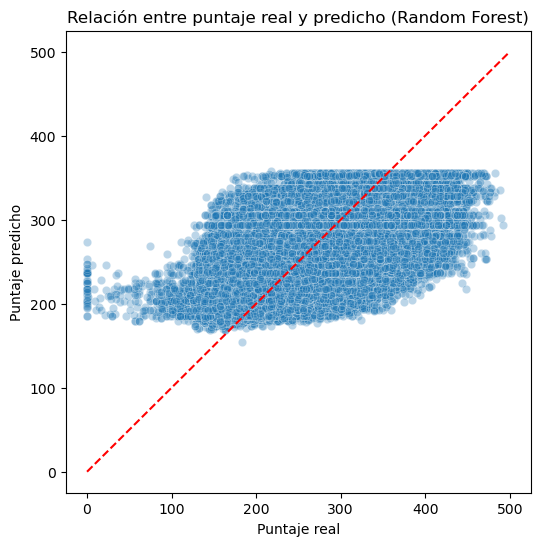

In [175]:
# Gráfico: Real vs Predicho

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.3)
plt.plot([0, 500], [0, 500], '--', color='red')
plt.xlabel("Puntaje real")
plt.ylabel("Puntaje predicho")
plt.title("Relación entre puntaje real y predicho (Random Forest)")
plt.show()


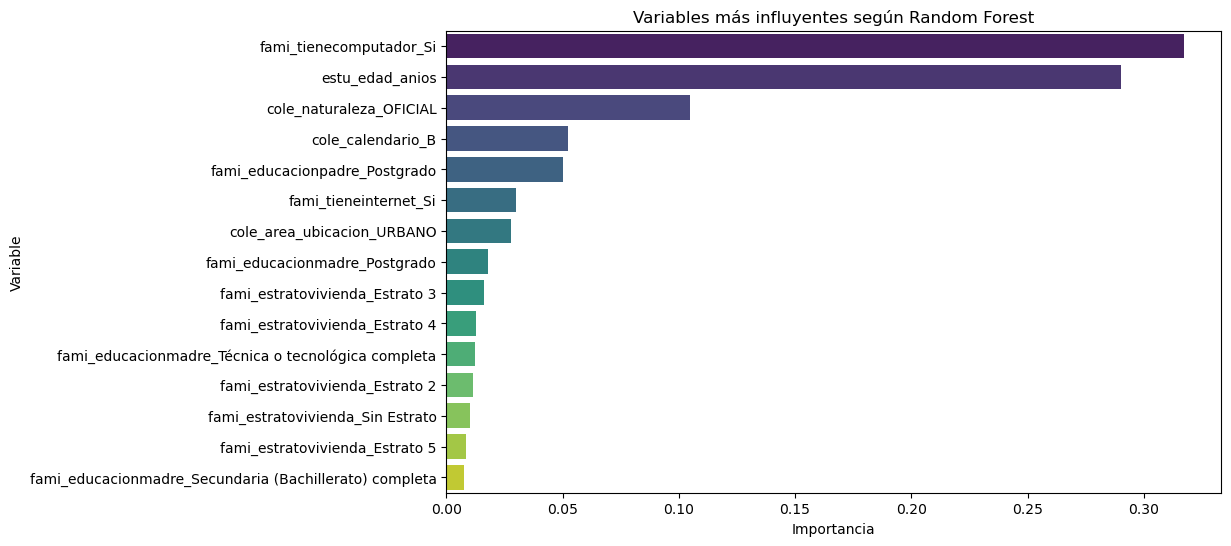

In [176]:
# Importancia de las variables

importancias = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': modelo_rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importancia', y='Variable', data=importancias.head(15), palette='viridis')
plt.title("Variables más influyentes según Random Forest")
plt.show()